In [1]:
import os
import sys

import pandas as pd
import glob
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.backends.backend_pdf
from matplotlib.backends.backend_pdf import PdfPages


import sklearn

from sklearn.preprocessing import StandardScaler
from sklearn.datasets.samples_generator import make_blobs
from sklearn.cluster import KMeans

from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LassoCV
from sklearn.ensemble import RandomForestClassifier

import scipy

import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression

from sklearn.preprocessing import PolynomialFeatures
from sklearn import metrics

import statsmodels.api as sm
from scipy import stats

import lxml
from io import StringIO 
import pickle

from fuzzywuzzy import process


import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


import seaborn as sns
sns.set(style="whitegrid")

/usr/local/lib/python3.7/site-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [2]:
pd.set_option('display.max_columns', 1000)
pd.options.display.max_rows=1000

pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', 1000)

plt.rcParams.update({'figure.max_open_warning': 0})


%matplotlib inline 

In [3]:
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

# import scripts.supervised_prep
from scripts.supervised_prep import dataprep_X
from scripts.supervised_prep import dataprep_Y
from scripts.supervised_prep import OLS_loop
from scripts.supervised_prep import PC1_loop
from scripts.supervised_prep import results_summary_to_dataframe


In [4]:
def fuzzy(x, SERIES):
    closest_match = process.extractOne(x, SERIES.values)[0]
    index = pd.Index(SERIES).get_loc(closest_match)
    return index

# Load Data

In [5]:
inroot = r"../data/input/07 Samsung UX Index - Web App Implementation/"
fname_data = inroot + r"Samsung UX Index Survey_Data.csv"
df_data = pd.read_csv(fname_data)
fname_vaxmap = inroot + r"Samsung UX Index Survey_Datamap.xlsx"
df_varmap = pd.read_excel(fname_vaxmap, header=1, sheet_name=0)
df_valmap = pd.read_excel(fname_vaxmap, header=1, sheet_name=1)



/usr/local/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3057: DtypeWarning: Columns (1218) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [6]:
df_addmap1 = pd.read_csv(inroot+"../additional_mapping/qxbrandxtrustxdrivers_quaitydrivers.csv")
df_addmap1.head()

,qxbrandxtrustxdrivers,Tag,quality_indicator,qxoverallxqualityxindicators,driver_category
0,qxbrandxtrustxdrivers_1,Transparent,Trust,qxoverallxqualityxindicators_1,Brand-Specific
1,qxbrandxtrustxdrivers_2,Ethical,Trust,qxoverallxqualityxindicators_1,Brand-Specific
2,qxbrandxtrustxdrivers_3,Respectful,Trust,qxoverallxqualityxindicators_1,Brand-Specific
3,qxbrandxtrustxdrivers_4,Integrity / honest,Trust,qxoverallxqualityxindicators_1,Brand-Specific
4,qxdrivers_1,Safe / secure,Trust,qxoverallxqualityxindicators_1,Core UX Principles


In [7]:
df_varmap[df_varmap.Variable.str.contains('d7_4')]

,Variable,Label,Short Label,Type,Minimum,Maximum,Description
1223,d7_4,D7. Asian or Asian American - What is your race?,NaN,integer,0.0,1.0,NaN


# Activities Mapping

In [8]:
df_actmap = pd.read_csv("../data/input/data_engineering/activities_map.csv")
df_varmap_activ = pd.read_csv("../data/input/data_engineering/df_varmap_activities_map.csv")

In [9]:
# df_varmap_activ = df_varmap[df_varmap.Variable.str.contains('activities')].copy()
# df_varmap_activ['match'] = df_varmap_activ['Label'].apply(fuzzy,  SERIES=df_actmap.Task)

In [10]:
# df_varmap_activ.loc[df_varmap_activ.Label.str.contains('Using speaker phone'),'match'] = 0
# df_varmap_activ.loc[df_varmap_activ.Label.str.contains('Charging battery'),'match'] = 1
# df_varmap_activ.loc[df_varmap_activ.Label.str.contains('Transferring files'),'match'] = 2
# df_varmap_activ.loc[df_varmap_activ.Label.str.contains('Unlocking'),'match'] = 3
# df_varmap_activ.loc[df_varmap_activ.Label.str.contains('Viewing screen'),'match'] = 4
# df_varmap_activ.loc[df_varmap_activ.Label.str.contains('Setting up multiple windows'),'match'] = 5
# df_varmap_activ.loc[df_varmap_activ.Label.str.contains('Organizing your home screen'),'match'] = 6
# df_varmap_activ.loc[df_varmap_activ.Label.str.contains('Using your quick settings'),'match'] = 7
# df_varmap_activ.loc[df_varmap_activ.Label.str.contains('Customizing settings'),'match'] = 8
# df_varmap_activ.loc[df_varmap_activ.Label.str.contains('Setting up and managing notifications'),'match'] = 9
# df_varmap_activ.loc[df_varmap_activ.Label.str.contains('Searching for something on your smartphone'),'match'] = 10
# df_varmap_activ.loc[df_varmap_activ.Label.str.contains('Scheduling a calendar event'),'match'] = 11
# df_varmap_activ.loc[df_varmap_activ.Label.str.contains('Setting an alarm'),'match'] = 12
# df_varmap_activ.loc[df_varmap_activ.Label.str.contains('Sending and receiving a text message'),'match'] = 13
# df_varmap_activ.loc[df_varmap_activ.Label.str.contains('rear-facing camera'),'match'] = 14
# df_varmap_activ.loc[df_varmap_activ.Label.str.contains('front-facing camera'),'match'] = 15
# df_varmap_activ.loc[df_varmap_activ.Label.str.contains('Recording a video'),'match'] = 16
# df_varmap_activ.loc[df_varmap_activ.Label.str.contains('Editing a photo'),'match'] = 17
# df_varmap_activ.loc[df_varmap_activ.Label.str.contains('Sharing a photo or file'),'match'] = 18
# df_varmap_activ.loc[df_varmap_activ.Label.str.contains('Using GPS'),'match'] = 19
# df_varmap_activ.loc[df_varmap_activ.Label.str.contains('Tracking your wellbeing'),'match'] = 20
# df_varmap_activ.loc[df_varmap_activ.Label.str.contains('Creating and editing a note'),'match'] = 21
# df_varmap_activ.loc[df_varmap_activ.Label.str.contains('Making a mobile payment'),'match'] = 22
# df_varmap_activ.loc[df_varmap_activ.Label.str.contains('Asking digital assistant a question'),'match'] = 23
# df_varmap_activ.loc[df_varmap_activ.Label.str.contains('Using an AR'),'match'] = 24


In [11]:
# df_varmap_activ.groupby('match')['Variable'].count()

In [12]:
# df_varmap_activ = df_varmap_activ.merge(df_actmap, left_on='match',
#                                         right_index=True, how='left')

In [13]:
# df_varmap_activ.to_csv("../data/input/data_engineering/df_varmap_activities_map.csv", index=False)

# merge on df_data

In [14]:
df_data = pd.read_csv("../data/input/data_engineering/df_data.csv")

In [15]:
df_activmatrix = df_varmap_activ[['Variable','Advanced','Social','Productivity']].copy().set_index('Variable')
df_activmatrix = df_activmatrix.transpose()

In [16]:
# df_data.loc[:,'Activitiesximportance_Advanced'] = df_data.filter(like='activities', 
#                axis=1).apply(pd.to_numeric, errors='coerce').multiply(
#                df_activmatrix.loc['Advanced']).filter(like='qxactivitiesximportance', 
#                axis=1).sum(axis=1, skipna=True)
# df_data.loc[:,'Activitiesximportance_Social'] = df_data.filter(like='activities', 
#                axis=1).apply(pd.to_numeric, errors='coerce').multiply(
#                df_activmatrix.loc['Social']).filter(like='qxactivitiesximportance', 
#                axis=1).sum(axis=1, skipna=True)
# df_data.loc[:,'Activitiesximportance_Productivity'] = df_data.filter(like='activities', 
#                axis=1).apply(pd.to_numeric, errors='coerce').multiply(
#                df_activmatrix.loc['Productivity']).filter(like='qxactivitiesximportance', 
#                axis=1).sum(axis=1, skipna=True)

# df_data.loc[:,'Activitiesxqualityxindicators_Advanced'] = df_data.filter(like='activities', 
#                axis=1).apply(pd.to_numeric, errors='coerce').multiply(
#                df_activmatrix.loc['Advanced']).filter(like='qxactivitiesxqualityxindicators', 
#                axis=1).sum(axis=1, skipna=True)
# df_data.loc[:,'Activitiesxqualityxindicators_Social'] = df_data.filter(like='activities', 
#                axis=1).apply(pd.to_numeric, errors='coerce').multiply(
#                df_activmatrix.loc['Social']).filter(like='qxactivitiesxqualityxindicators', 
#                axis=1).sum(axis=1, skipna=True)
# df_data.loc[:,'Activitiesxqualityxindicators_Productivity'] = df_data.filter(like='activities', 
#                axis=1).apply(pd.to_numeric, errors='coerce').multiply(
#                df_activmatrix.loc['Productivity']).filter(like='qxactivitiesxqualityxindicators', 
#                axis=1).sum(axis=1, skipna=True)

# df_data.loc[:,'Activitiesxsatisfaction_Advanced'] = df_data.filter(like='activities', 
#    axis=1).apply(pd.to_numeric, errors='coerce').multiply(
#     df_activmatrix.loc['Advanced']).filter(like='qxactivitiesxsatisfaction', 
#                axis=1).sum(axis=1, skipna=True)
# df_data.loc[:,'Activitiesxsatisfaction_Social'] = df_data.filter(like='activities', 
#    axis=1).apply(pd.to_numeric, errors='coerce').multiply(
#     df_activmatrix.loc['Social']).filter(like='qxactivitiesxsatisfaction', 
#                axis=1).sum(axis=1, skipna=True)
# df_data.loc[:,'Activitiesxsatisfaction_Productivity'] = df_data.filter(like='activities', 
#    axis=1).apply(pd.to_numeric, errors='coerce').multiply(
#     df_activmatrix.loc['Productivity']).filter(like='qxactivitiesxsatisfaction', 
#                axis=1).sum(axis=1, skipna=True)

# df_data.loc[:,'Activitiesxdrivers_Advanced'] = df_data.filter(like='activities', 
#    axis=1).apply(pd.to_numeric, errors='coerce').multiply(
#     df_activmatrix.loc['Advanced']).filter(like='qxactivitiesxdrivers', 
#                axis=1).sum(axis=1, skipna=True)
# df_data.loc[:,'Activitiesxdrivers_Social'] = df_data.filter(like='qxactivitiesxdrivers', 
#    axis=1).apply(pd.to_numeric, errors='coerce').multiply(
#     df_activmatrix.loc['Social']).filter(like='qxactivitiesxdrivers', 
#                axis=1).sum(axis=1, skipna=True)
# df_data.loc[:,'Activitiesxdrivers_Productivity'] = df_data.filter(like='activities', 
#    axis=1).apply(pd.to_numeric, errors='coerce').multiply(
#     df_activmatrix.loc['Productivity']).filter(like='qxactivitiesxdrivers', 
#                axis=1).sum(axis=1, skipna=True)



In [17]:

# df_data.loc[:,'Activitiesxrecency_Advanced'] = df_data.filter(like='activities', 
#    axis=1).apply(pd.to_numeric, errors='coerce').multiply(
#     df_activmatrix.loc['Advanced']).filter(like='qxactivitiesxrecency', 
#                axis=1).sum(axis=1, skipna=True)
# df_data.loc[:,'Activitiesxrecency_Social'] = df_data.filter(like='activities', 
#    axis=1).apply(pd.to_numeric, errors='coerce').multiply(
#     df_activmatrix.loc['Social']).filter(like='qxactivitiesxrecency', 
#                axis=1).sum(axis=1, skipna=True)
# df_data.loc[:,'Activitiesxrecency_Productivity'] = df_data.filter(like='activities', 
#    axis=1).apply(pd.to_numeric, errors='coerce').multiply(
#     df_activmatrix.loc['Productivity']).filter(like='qxactivitiesxrecency', 
#                axis=1).sum(axis=1, skipna=True)



In [18]:
# df_data.filter(like='Activitiesx', axis=1).describe()

In [19]:
# df_data.to_csv("../data/input/data_engineering/df_data.csv", index=False)

In [20]:
df_data = pd.read_csv("../data/input/data_engineering/df_data.csv")

# Determine PC1 weighting

In [21]:
SuperLabels = ['activitiesximportance',
               'activitiesxquality',
               'activitiesxsatisfaction',
               'activitiesxdrivers',
              'activitiesxrecency']



SuperList = [[ x for x in df_data.columns if 'qxactivitiesximportance' in x ],
                [ x for x in df_data.columns if 'qxactivitiesxqualityxindicators' in x ],
                                 [ x for x in df_data.columns if 'qxactivitiesxsatisfaction' in x ],
                                 [ x for x in df_data.columns if 'qxactivitiesxdrivers' in x ],
            [ x for x in df_data.columns if 'qxactivitiesxrecency' in x ]]

pc1_exvr_list, df_data_PC1 = PC1_loop(SuperLabels, SuperList, df_data, df_varmap)

/usr/local/lib/python3.7/site-packages/pandas/core/frame.py:3489: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]
/usr/local/lib/python3.7/site-packages/pandas/core/frame.py:3489: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]
/usr/local/lib/python3.7/site-packages/pandas/core/frame.py:3489: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentat

In [22]:
pc1_exvr_list

[('activitiesximportance', 0.347514975412082),
 ('activitiesxquality', 0.39025088878623765),
 ('activitiesxsatisfaction', 0.4674496272711221),
 ('activitiesxdrivers', 0.48742259201470056),
 ('activitiesxrecency', 0.24898685928307404)]

In [23]:
df_data_PC1.head()

,activitiesximportance_PC1,activitiesxquality_PC1,activitiesxsatisfaction_PC1,activitiesxdrivers_PC1,activitiesxrecency_PC1
0,-22.060576,0.000000,0.000000,0.000000,34.565731
1,-26.382936,-27.014463,-13.661970,-33.371222,18.589916
2,-21.025249,-24.453845,-10.803175,-27.017103,19.976097
3,-21.390272,-22.897507,-17.419699,-19.492965,17.570531
4,-29.367805,-41.689803,-20.702557,-52.269820,15.885337


In [24]:
df_data_PC1.describe()

,activitiesximportance_PC1,activitiesxquality_PC1,activitiesxsatisfaction_PC1,activitiesxdrivers_PC1,activitiesxrecency_PC1
count,3254.000000,3254.000000,3254.000000,3254.000000,3254.000000
mean,-26.233484,-44.424512,-22.866827,-45.311521,13.105597
std,4.523292,11.448522,5.721676,12.358495,4.100135
min,-34.777814,-68.294361,-34.143427,-68.695075,4.937962
25%,-29.492749,-52.584050,-26.928802,-54.346590,10.281197
50%,-26.623999,-45.262248,-23.417109,-46.429821,12.605096
75%,-23.410049,-37.280167,-19.354922,-37.550803,15.529045
max,-7.327338,0.000000,0.000000,0.000000,40.365998


# y=FE_advanced regression

In [25]:
ohdict = {'qxcurrentxos' :  None, 'd4' :  None, 'd1' : None, 'qxcurrentxmodel': None, 'hbrand' : None,
          'hmodelquota' : None, 'hmodelquota_reordered' : None,'Empowered_Customer_Groups' : None}
                 

varlist_X = ['d1',  # gender
             'd2',  # age
             'hbrand', # device brand
             'd3_1', 'd3_2',    'd3_3',    'd3_4',    # employment
             'd4', # education
             'd6',    # hispanic
             'd7_1', 'd7_2',    'd7_3',    'd7_4',    'd7_5',    'd7_97',    'd7_99' # race
            ]

X, df_varmap = dataprep_X (df_data, df_varmap, df_valmap, varlist_X, 
                       ohdict=ohdict)

like_str = 'Activitiesx'
var_y_list = df_data.filter(like=like_str, axis=1).columns.values
print(var_y_list)
print()
tp_list_FEadv, df_lmresults_FEadv = OLS_loop (var_y_list, ohdict, X, df_data, df_varmap)

print (tp_list_FEadv)
print()

df_lmresults_FEadv.head()

['Activitiesximportance_Advanced' 'Activitiesximportance_Social'
 'Activitiesximportance_Productivity'
 'Activitiesxqualityxindicators_Advanced'
 'Activitiesxqualityxindicators_Social'
 'Activitiesxqualityxindicators_Productivity'
 'Activitiesxsatisfaction_Advanced' 'Activitiesxsatisfaction_Social'
 'Activitiesxsatisfaction_Productivity' 'Activitiesxdrivers_Advanced'
 'Activitiesxdrivers_Social' 'Activitiesxdrivers_Productivity'
 'Activitiesxrecency_Advanced' 'Activitiesxrecency_Social'
 'Activitiesxrecency_Productivity']

[('Activitiesximportance_Advanced', 0.05552432127733298), ('Activitiesximportance_Social', 0.03825775590524727), ('Activitiesximportance_Productivity', 0.046218815778263034), ('Activitiesxqualityxindicators_Advanced', 0.06537630767784064), ('Activitiesxqualityxindicators_Social', 0.02403758061586403), ('Activitiesxqualityxindicators_Productivity', 0.06584008182299972), ('Activitiesxsatisfaction_Advanced', 0.05177466215566684), ('Activitiesxsatisfaction_Social', 0.019

,Variable,Label,coeff,pvals,var_y
1220.0,d7_1,White,-0.29235,0.00000,Activitiesximportance_Advanced
0.0,d4_3,Some college – no degree,0.11708,0.03404,Activitiesximportance_Advanced
0.0,d4_1,Some high school or less,-0.35897,0.00038,Activitiesximportance_Advanced
0.0,d4_2,High school graduate,0.11743,0.03648,Activitiesximportance_Advanced
0.0,d1_4,Gender - Would rather not say,-1.10746,0.01767,Activitiesximportance_Advanced


# y=PC1 regression

In [26]:
ohdict = {'qxcurrentxos' :  None, 'd4' :  None, 'd1' : None, 'qxcurrentxmodel': None, 'hbrand' : None,
          'hmodelquota' : None, 'hmodelquota_reordered' : None,'Empowered_Customer_Groups' : None}
                 

varlist_X = ['d1',  # gender
             'd2',  # age
             'hbrand', # device brand
             'd3_1', 'd3_2',    'd3_3',    'd3_4',    # employment
             'd4', # education
             'd6',    # hispanic
             'd7_1', 'd7_2',    'd7_3',    'd7_4',    'd7_5',    'd7_97',    'd7_99' # race
            ]

X, df_varmap = dataprep_X (df_data, df_varmap, df_valmap, varlist_X, 
                       ohdict=ohdict)

like_str = '_PC1'
var_y_list = df_data_PC1.filter(like=like_str, axis=1).columns.values
print(var_y_list)
print()
tp_list_PC1, df_lmresults_PC1 = OLS_loop (var_y_list, ohdict, X, df_data_PC1, df_varmap)

print (tp_list_PC1)
print()

df_lmresults_PC1.head()

['activitiesximportance_PC1' 'activitiesxquality_PC1'
 'activitiesxsatisfaction_PC1' 'activitiesxdrivers_PC1'
 'activitiesxrecency_PC1']

[('activitiesximportance_PC1', 0.03771097078973917), ('activitiesxquality_PC1', 0.03065046519304282), ('activitiesxsatisfaction_PC1', 0.02040419843722907), ('activitiesxdrivers_PC1', 0.029179541356811667), ('activitiesxrecency_PC1', 0.10204355311363289)]



,Variable,Label,coeff,pvals,var_y
1220.0,d7_1,White,0.17595,0.00452,activitiesximportance_PC1
0.0,d4_3,Some college – no degree,-0.11504,0.03908,activitiesximportance_PC1
0.0,d4_1,Some high school or less,0.24201,0.01753,activitiesximportance_PC1
0.0,d1_4,Gender - Would rather not say,1.48456,0.00164,activitiesximportance_PC1
0.0,d1_1,Gender - Male,0.13688,0.00037,activitiesximportance_PC1


# y= UX_Index & UX_Loyalty

In [44]:
ohdict = {'qxcurrentxos' :  None, 'd4' :  None, 'd1' : None, 'qxcurrentxmodel': None, 'hbrand' : None,
          'hmodelquota' : None, 'hmodelquota_reordered' : None,'Empowered_Customer_Groups' : None}
                 

varlist_X = ['d1',  # gender
             'd2',  # age
             'hbrand', # device brand
             'd3_1', 'd3_2',    'd3_3',    'd3_4',    # employment
             'd4', # education
             'd6',    # hispanic
             'd7_1', 'd7_2',    'd7_3',    'd7_4',    'd7_5',    'd7_97',    'd7_99' # race
            ]

X, df_varmap = dataprep_X (df_data, df_varmap, df_valmap, varlist_X, 
                       ohdict=ohdict)

like_str='_UXI'
var_y_list = df_data.filter(like=like_str, axis=1).columns.values
var_y_list = np.append('UX_Loyalty',var_y_list)
var_y_list = np.append('UXindex',var_y_list)
print(var_y_list)
print()
tp_list_UXi, df_lmresults_UXi = OLS_loop (var_y_list, ohdict, X, df_data, df_varmap)

print (tp_list_UXi)
print()

df_lmresults_UXi.head()

['UXindex' 'UX_Loyalty' 'speaker_phone_UXI' 'charging_battery_UXI'
 'transferring_files_UXI' 'unlocking_UXI' 'display_UXI'
 'multiple_windows_UXI' 'organizing_home_screen_UXI' 'quick_settings_UXI'
 'customizing_settings_UXI' 'notifications_UXI' 'search_phone_UXI'
 'calendar_events_and_reminders_UXI' 'alarm_UXI'
 'sending_and_receiving_texts_UXI' 'rear_camera_UXI' 'front_camera_UXI'
 'video_recording_UXI' 'photo_editing_UXI' 'sharing_UXI'
 'location_services_UXI' 'tracking_wellbeing_UXI' 'using_notes_UXI'
 'mobile_payment_UXI' 'digital_assistant_UXI' 'AR_shopping_UXI']

[('UXindex', 0.05824624124380262), ('UX_Loyalty', 0.09655705591311292), ('speaker_phone_UXI', 0.02570489293784306), ('charging_battery_UXI', 0.03512102717446852), ('transferring_files_UXI', 0.03000182178734745), ('unlocking_UXI', 0.03540002902734074), ('display_UXI', 0.04239295549051225), ('multiple_windows_UXI', 0.011864840516904729), ('organizing_home_screen_UXI', 0.024723787652326967), ('quick_settings_UXI', 0.0320155

,Variable,Label,coeff,pvals,var_y
1213.0,d3_2,Employed,0.22620,0.02432,UXindex
1214.0,d3_3,Retired,0.40077,0.01731,UXindex
1215.0,d3_4,Not currently employed or in school,0.31149,0.00585,UXindex
0.0,d1_4,Gender - Would rather not say,-1.36521,0.00341,UXindex
0.0,d1_3,Gender - Non-binary,-0.79343,0.00045,UXindex


# *+ACTIVITIES_RECENCY* [y=FE_advanced regression]

In [28]:
# add activities_recency_pc1 col to df_data
df_data['activitiesxrecency_PC1'] = df_data_PC1['activitiesxrecency_PC1']

In [29]:
ohdict = {'qxcurrentxos' :  None, 'd4' :  None, 'd1' : None, 'qxcurrentxmodel': None, 'hbrand' : None,
          'hmodelquota' : None, 'hmodelquota_reordered' : None,'Empowered_Customer_Groups' : None}
                 

varlist_X = ['d1',  # gender
             'd2',  # age
             'hbrand', # device brand
             'd3_1', 'd3_2',    'd3_3',    'd3_4',    # employment
             'd4', # education
             'd6',    # hispanic
             'd7_1', 'd7_2',    'd7_3',    'd7_4',    'd7_5',    'd7_97',    'd7_99', # race
             'activitiesxrecency_PC1'
            ]

X, df_varmap = dataprep_X (df_data, df_varmap, df_valmap, varlist_X, 
                       ohdict=ohdict)

like_str = 'Activitiesx'
var_y_list = df_data.filter(like=like_str, axis=1).columns.values
var_y_list = [y for y in var_y_list if 'xrecency' not in y] # remove predictor from response list
print(var_y_list)
print()
tp_list_FEadv2, df_lmresults_FEadv2 = OLS_loop (var_y_list, ohdict, X, df_data, df_varmap)

print (tp_list_FEadv2)
print()

df_lmresults_FEadv2.head()

['Activitiesximportance_Advanced', 'Activitiesximportance_Social', 'Activitiesximportance_Productivity', 'Activitiesxqualityxindicators_Advanced', 'Activitiesxqualityxindicators_Social', 'Activitiesxqualityxindicators_Productivity', 'Activitiesxsatisfaction_Advanced', 'Activitiesxsatisfaction_Social', 'Activitiesxsatisfaction_Productivity', 'Activitiesxdrivers_Advanced', 'Activitiesxdrivers_Social', 'Activitiesxdrivers_Productivity']

[('Activitiesximportance_Advanced', 0.19128065588215037), ('Activitiesximportance_Social', 0.16752592530941468), ('Activitiesximportance_Productivity', 0.1749532935253828), ('Activitiesxqualityxindicators_Advanced', 0.6205327280702491), ('Activitiesxqualityxindicators_Social', 0.4014990191080098), ('Activitiesxqualityxindicators_Productivity', 0.6420169243360669), ('Activitiesxsatisfaction_Advanced', 0.6076301378470021), ('Activitiesxsatisfaction_Social', 0.3644502193147159), ('Activitiesxsatisfaction_Productivity', 0.623616681359067), ('Activitiesxdriver

,Variable,Label,coeff,pvals,var_y
2.0,d2,Age,0.01332,0.00015,Activitiesximportance_Advanced
1220.0,d7_1,White,-0.12435,0.02988,Activitiesximportance_Advanced
0.0,d4_3,Some college – no degree,0.18282,0.00036,Activitiesximportance_Advanced
0.0,d4_2,High school graduate,0.24622,0.00000,Activitiesximportance_Advanced
0.0,d4_5,4-year college degree,0.12881,0.00738,Activitiesximportance_Advanced


# *+ACTIVITIES_RECENCY* [y=UX_Index & UX_Loyalty]

In [30]:
ohdict = {'qxcurrentxos' :  None, 'd4' :  None, 'd1' : None, 'qxcurrentxmodel': None, 'hbrand' : None,
          'hmodelquota' : None, 'hmodelquota_reordered' : None,'Empowered_Customer_Groups' : None}
                 

varlist_X = ['d1',  # gender
             'd2',  # age
             'hbrand', # device brand
             'd3_1', 'd3_2',    'd3_3',    'd3_4',    # employment
             'd4', # education
             'd6',    # hispanic
             'd7_1', 'd7_2',    'd7_3',    'd7_4',    'd7_5',    'd7_97',    'd7_99', # race
             'activitiesxrecency_PC1']

X, df_varmap = dataprep_X (df_data, df_varmap, df_valmap, varlist_X, 
                       ohdict=ohdict)

like_str='_UXI'
var_y_list = df_data.filter(like=like_str, axis=1).columns.values
var_y_list = np.append('UXindex',var_y_list)
var_y_list = np.append('UX_Loyalty',var_y_list)
print(var_y_list)
print()
tp_list_UXi2, df_lmresults_UXi2 = OLS_loop (var_y_list, ohdict, X, df_data, df_varmap)

print (tp_list_UXi2)
print()

df_lmresults_UXi2.head()

['UX_Loyalty' 'UXindex' 'speaker_phone_UXI' 'charging_battery_UXI'
 'transferring_files_UXI' 'unlocking_UXI' 'display_UXI'
 'multiple_windows_UXI' 'organizing_home_screen_UXI' 'quick_settings_UXI'
 'customizing_settings_UXI' 'notifications_UXI' 'search_phone_UXI'
 'calendar_events_and_reminders_UXI' 'alarm_UXI'
 'sending_and_receiving_texts_UXI' 'rear_camera_UXI' 'front_camera_UXI'
 'video_recording_UXI' 'photo_editing_UXI' 'sharing_UXI'
 'location_services_UXI' 'tracking_wellbeing_UXI' 'using_notes_UXI'
 'mobile_payment_UXI' 'digital_assistant_UXI' 'AR_shopping_UXI']

[('UX_Loyalty', 0.12009725724198661), ('UXindex', 0.07721331878820448), ('speaker_phone_UXI', 0.03984624323243091), ('charging_battery_UXI', 0.05395737577981086), ('transferring_files_UXI', 0.04552301534512693), ('unlocking_UXI', 0.04829264909445463), ('display_UXI', 0.05209259690736545), ('multiple_windows_UXI', 0.02186591624950851), ('organizing_home_screen_UXI', 0.0508929212308602), ('quick_settings_UXI', 0.0455114060

,Variable,Label,coeff,pvals,var_y
2.0,d2,Age,0.02022,0.00000,UX_Loyalty
1213.0,d3_2,Employed,0.21078,0.02996,UX_Loyalty
1214.0,d3_3,Retired,0.41587,0.01064,UX_Loyalty
1215.0,d3_4,Not currently employed or in school,0.35972,0.00100,UX_Loyalty
1225.0,d7_97,Another race,0.26801,0.02291,UX_Loyalty


# Compare coeff across models - Advanced

In [31]:
MSTR_lmresults_FEadv = pd.concat([df_lmresults_FEadv, df_lmresults_FEadv2], 
          keys=['no_rec', 'ys_rec'], names=['LM_run', 'Row_ID']).reset_index()


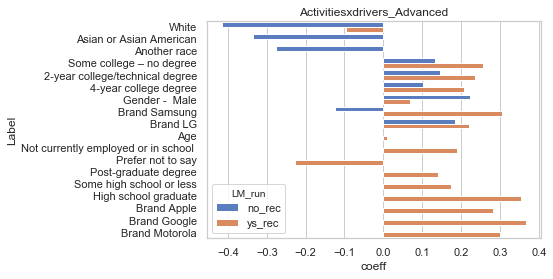

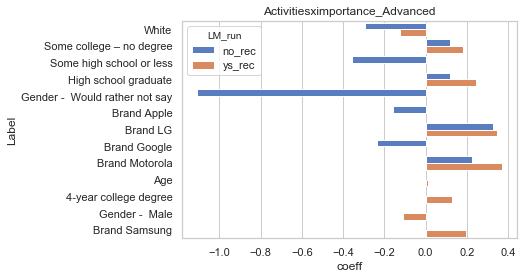

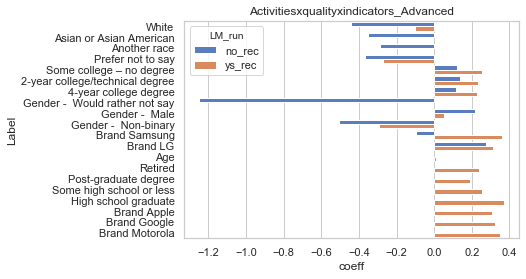

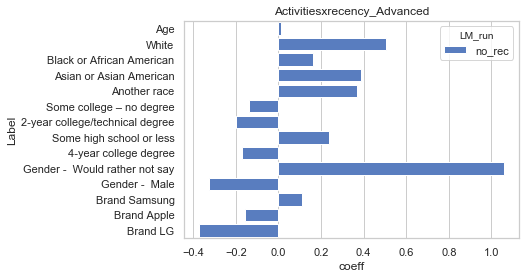

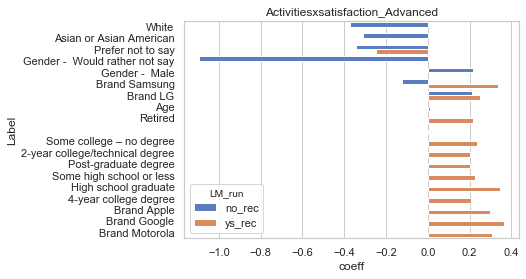

In [32]:
for i, var in enumerate(np.unique(MSTR_lmresults_FEadv[MSTR_lmresults_FEadv.var_y.str.contains('Advanced')].var_y)):
    plt.figure(i)
    sns.barplot(y="Label", x="coeff", hue="LM_run", 
                     data=MSTR_lmresults_FEadv[MSTR_lmresults_FEadv.var_y==var],
                    palette="muted").set_title(var)

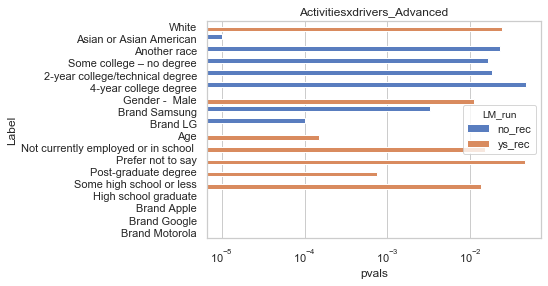

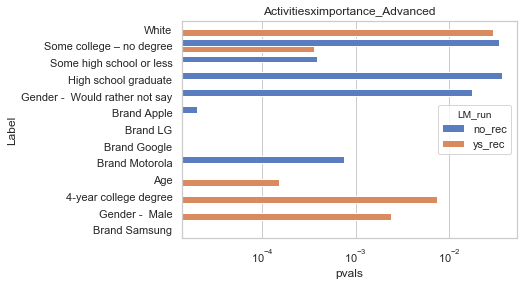

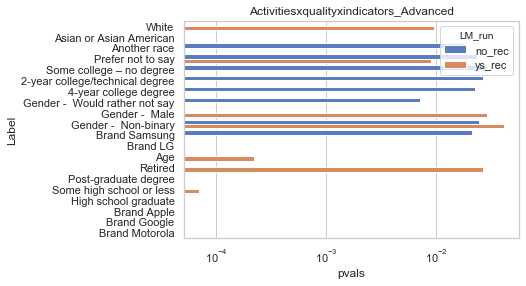

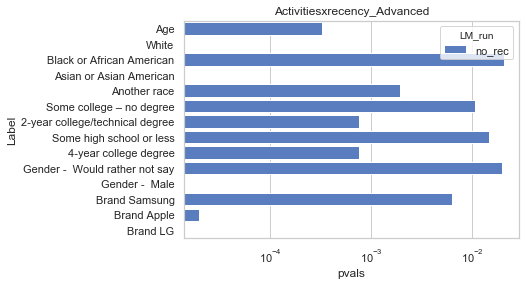

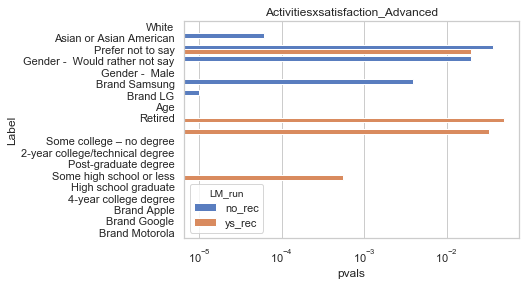

In [35]:
for i, var in enumerate(np.unique(MSTR_lmresults_FEadv[MSTR_lmresults_FEadv.var_y.str.contains('Advanced')].var_y)):
    plt.figure(i)
    ax = sns.barplot(y="Label", x="pvals", hue="LM_run", 
                     data=MSTR_lmresults_FEadv[MSTR_lmresults_FEadv.var_y==var],
                    palette="muted")
    ax.set_title(var)
    ax.set_xscale("log")

In [36]:
# MSTR_list_UXi = pd.merge(.set_index(0),
#                          pd.DataFrame(tp_list_UXi).set_index(0),  
#                         left_index=True, right_index=True)
tmp_df1 = pd.DataFrame(tp_list_FEadv).set_index(0)
tmp_df1['run'] = 'r2_no_rec'
tmp_df2 = pd.DataFrame(tp_list_FEadv2).set_index(0)
tmp_df2['run'] = 'r2_ys_rec'
MSTR_list_FEadv = tmp_df1.append(tmp_df2)
MSTR_list_FEadv = pd.DataFrame(MSTR_list_FEadv.to_records()) 
MSTR_list_FEadv.columns = ['response', 'r2', 'run']
MSTR_list_FEadv.head()


,response,r2,run
0,Activitiesximportance_Advanced,0.055524,r2_no_rec
1,Activitiesximportance_Social,0.038258,r2_no_rec
2,Activitiesximportance_Productivity,0.046219,r2_no_rec
3,Activitiesxqualityxindicators_Advanced,0.065376,r2_no_rec
4,Activitiesxqualityxindicators_Social,0.024038,r2_no_rec


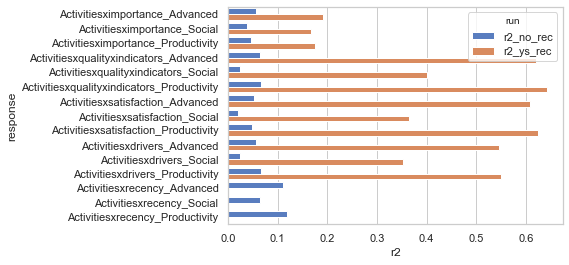

In [37]:
ax = sns.barplot(y="response", x="r2", hue="run", 
                 data=MSTR_list_FEadv,#[MSTR_list_FEadv.response.isin(['UXindex','UX_Loyalty'])],
                palette="muted")

# Compare coeff across models - UXi

In [38]:
MSTR_lmresults_UXi = pd.concat([df_lmresults_UXi, df_lmresults_UXi2], 
          keys=['no_rec', 'ys_rec'], names=['LM_run', 'Row_ID']).reset_index()
MSTR_lmresults_UXi.head()

,LM_run,Row_ID,Variable,Label,coeff,pvals,var_y
0,no_rec,2.0,d2,Age,0.01694,0.00000,UX_Loyalty
1,no_rec,1213.0,d3_2,Employed,0.21561,0.02841,UX_Loyalty
2,no_rec,1214.0,d3_3,Retired,0.39467,0.01671,UX_Loyalty
3,no_rec,1215.0,d3_4,Not currently employed or in school,0.34053,0.00210,UX_Loyalty
4,no_rec,1223.0,d7_4,Asian or Asian American,-0.19084,0.01141,UX_Loyalty


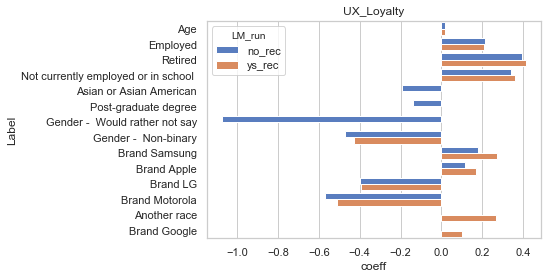

In [39]:
var='UX_Loyalty'
ax = sns.barplot(y="Label", x="coeff", hue="LM_run", 
                 data=MSTR_lmresults_UXi[MSTR_lmresults_UXi.var_y==var],
                palette="muted").set_title(var)

Text(0.5, 1.0, 'UX_Loyalty')

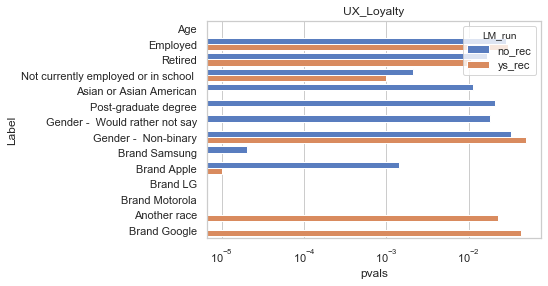

In [40]:
var='UX_Loyalty'
ax = sns.barplot(y="Label", x="pvals", hue="LM_run", 
                 data=MSTR_lmresults_UXi[MSTR_lmresults_UXi.var_y=='UX_Loyalty'],
                palette="muted")
ax.set_xscale("log")
ax.set_title(var)

In [46]:
# MSTR_list_UXi = pd.merge(.set_index(0),
#                          pd.DataFrame(tp_list_UXi).set_index(0),  
#                         left_index=True, right_index=True)
tmp_df1 = pd.DataFrame(tp_list_UXi).set_index(0)
tmp_df1['run'] = 'r2_no_rec'
tmp_df2 = pd.DataFrame(tp_list_UXi2).set_index(0)
tmp_df2['run'] = 'r2_ys_rec'
MSTR_list_UXi = tmp_df1.append(tmp_df2)
MSTR_list_UXi = pd.DataFrame(MSTR_list_UXi.to_records()) 
MSTR_list_UXi.columns = ['response', 'r2', 'run']
MSTR_list_UXi.head()


,response,r2,run
0,UXindex,0.058246,r2_no_rec
1,UX_Loyalty,0.096557,r2_no_rec
2,speaker_phone_UXI,0.025705,r2_no_rec
3,charging_battery_UXI,0.035121,r2_no_rec
4,transferring_files_UXI,0.030002,r2_no_rec


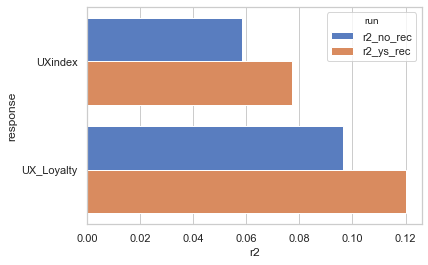

In [47]:
ax = sns.barplot(y="response", x="r2", hue="run", 
                 data=MSTR_list_UXi[MSTR_list_UXi.response.isin(['UXindex','UX_Loyalty'])],
                palette="muted")

In [43]:
MSTR_list_UXi

,response,r2,run
0,UX_Loyalty,0.096557,r2_no_rec
1,speaker_phone_UXI,0.025705,r2_no_rec
2,charging_battery_UXI,0.035121,r2_no_rec
3,transferring_files_UXI,0.030002,r2_no_rec
4,unlocking_UXI,0.035400,r2_no_rec
5,display_UXI,0.042393,r2_no_rec
6,multiple_windows_UXI,0.011865,r2_no_rec
7,organizing_home_screen_UXI,0.024724,r2_no_rec
8,quick_settings_UXI,0.032016,r2_no_rec
9,customizing_settings_UXI,0.028424,r2_no_rec


# Write Outputs

In [51]:
MSTR_lmresults_FEadv.append(MSTR_lmresults_UXi).to_csv('../data/output/regression_params.csv', index=False)
MSTR_list_FEadv.append(MSTR_list_UXi).to_csv('../data/output/regression_r2.csv', index=False)


,LM_run,Row_ID,Variable,Label,coeff,pvals,var_y
0,no_rec,1220.0,d7_1,White,-0.29235,0.00000,Activitiesximportance_Advanced
1,no_rec,0.0,d4_3,Some college – no degree,0.11708,0.03404,Activitiesximportance_Advanced
2,no_rec,0.0,d4_1,Some high school or less,-0.35897,0.00038,Activitiesximportance_Advanced
3,no_rec,0.0,d4_2,High school graduate,0.11743,0.03648,Activitiesximportance_Advanced
4,no_rec,0.0,d1_4,Gender - Would rather not say,-1.10746,0.01767,Activitiesximportance_Advanced


# ARCHIVE

In [ ]:
# Decision Trees

# Decision Trees

from sklearn import tree

clf = tree.DecisionTreeRegressor()
clf = clf.fit(X_train,y_train)

import graphviz 
dot_data = tree.export_graphviz(clf, out_file='../data/output/tree_unstd.dot',
                                feature_names=X_train.columns,
                               filled=True, rounded= True, max_depth = 5) 

!dot -Tpng ../data/output/tree_unstd.dot -o ../data/output/tree_unstd.png

![title]("../data/output/tree.png")

In [ ]:
# Decision Trees

from sklearn import tree

ohdict = {'qxcurrentxos': None, 'd4': None, 'd1': None, 'qxcurrentxmodel': None, 
              'hbrand': None, 'hmodelquota': None, 'hmodelquota_reordered': None, 
              'Empowered_Customer_Groups': None}
varlist_X = ['d1', 'd2', 'hbrand', 'd3_1', 'd3_2', 'd3_3', 'd3_4', 'd4', 'd6', 'd7_1', 
                 'd7_2', 'd7_3', 'd7_4', 'd7_5', 'd7_97', 'd7_99']
Y = dataprep_Y (df_data, 'UX_Loyalty')
X, df_varmap = dataprep_X (df_data, df_varmap, df_valmap, varlist_X, ohdict=ohdict)

clf = tree.DecisionTreeRegressor()
clf = clf.fit(X,Y)

import graphviz 
dot_data = tree.export_graphviz(clf, out_file='../data/output/tree_UXloy.dot',
                                feature_names=X.columns,
                               filled=True, rounded= True, max_depth = 5) 

